In [1]:
from torchHHT import hht, visualization
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
fs = 20000
df = pd.read_csv("data/2nd_test.csv", sep='\t', names=['B1', 'B2', 'B3', 'B4'])
tensor = torch.Tensor(df['B2'].values)

if torch.cuda.is_available():
    device = torch.device("cuda:0")  # Select GPU device 0
    tensor = tensor.cuda() # notify to put tensor on GPU

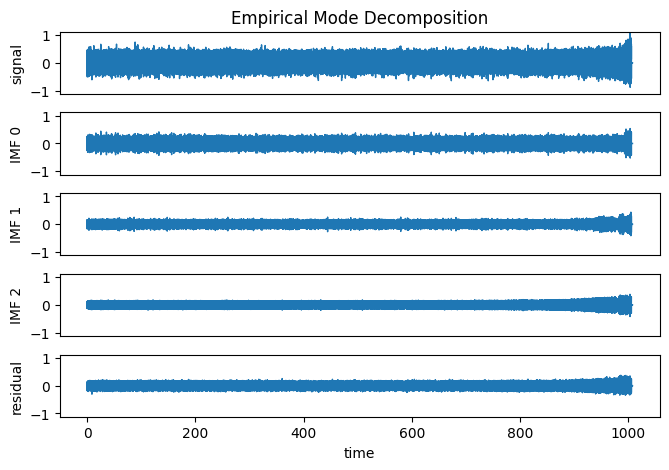

CPU times: user 22min 24s, sys: 1min 7s, total: 23min 32s
Wall time: 23min 27s


In [3]:
%%time
imfs, imfs_env, imfs_freq = hht.hilbert_huang(tensor, fs, num_imf=3)
visualization.plot_IMFs(tensor, imfs, fs)

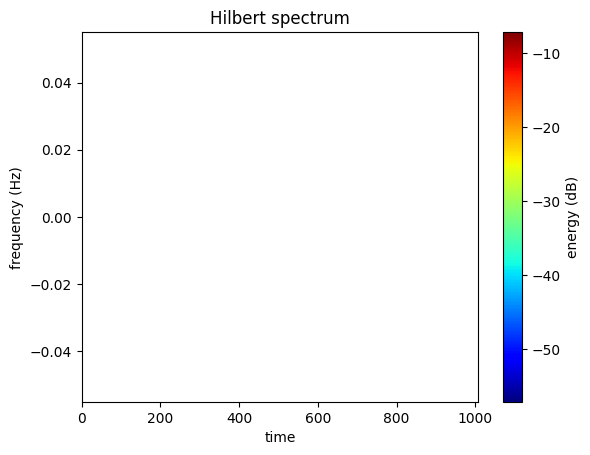

In [8]:
spectrum, t, f = hht.hilbert_spectrum(imfs_env, imfs_freq, fs, freq_lim = None, time_scale=1, freq_res = 20000)
visualization.plot_HilbertSpectrum(spectrum, t, f)

In [12]:
torch.save(imfs, "imfs_dataset2_bearing2.pt")
torch.save(imfs_env, 'imfs_env_dataset2_bearing2.pt')
torch.save(imfs_freq, 'imfs_freq_dataset2_bearing2.pt')

torch.save(spectrum, "hilbert_spectrum_dataset2_bearing2.pt")
torch.save(t, "time_axis_dataset2_bearing2.pt")
torch.save(f, "freq_axis_dataset2_bearing2.pt")